In [1]:
import csv
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random
from statistics import mean 
import pandas as pd


In [4]:

# This scriptworks with BiLogBrainMutationDistributions.csv files
# (for mutation distributions) and LOD_data.csv files for fixation rates.

condition = "../../" # path to your data
repRange = [] # if empty, will pull files from condition/*, if [x,y] will load files from condition/x,x+1,x+2...y-1,y/*

show_2_point_mutations = False # if you are collecting 2 point mutations and want to see their distribuiton set to true

In [5]:
mutDist = []
reps = []

if len(repRange) > 0:
    for rep in range (repRange[0],repRange[1]+1):
        mutDist.append(pd.read_csv(condition + '/' + rep + '/BiLogBrainMutationDistributions.csv'))
else:
    mutDist.append(pd.read_csv(condition + '/BiLogBrainMutationDistributions.csv'))


In [6]:
newThing = {}
for key in mutDist[0].keys():
    dataCollection = []
    for df in mutDist:
        dataCollection.append(list(df[key])) # this is a list for values across time for one rep
    dataCollection = np.transpose(dataCollection) # convert data so lists are now organised so that lists is all reps per time
    dataCollection = [x.mean() for x in dataCollection] # get ave of all reps at each time
    newThing[key]=dataCollection
mutDistAve_df=pd.DataFrame(newThing)


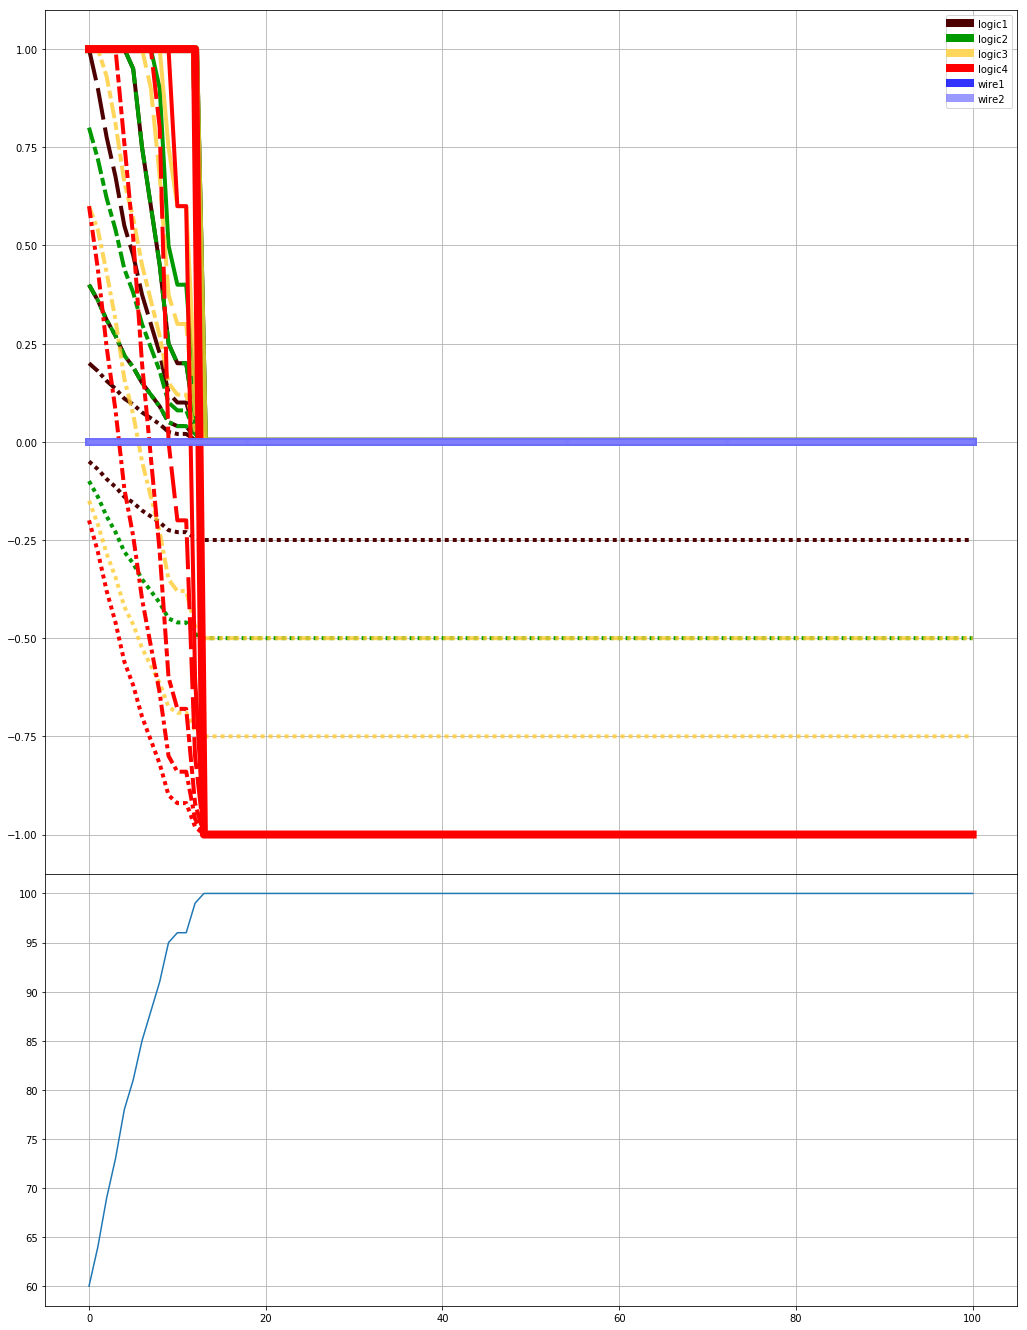

In [7]:
plt.rcParams['figure.figsize'] = (15,15)
nameList = ["logic1","logic2","logic3","logic4","wire1","wire2"]
if (show_2_point_mutations):
    for val in range(6,42):
        nameList.append(str(val))
colorList = [(.3,0,0,1),(0,.6,0,1),(1,.8,.2,.8),(1,0,0,1),(0,0,1,.8),(.5,.5,1,.8)]
colorList  = colorList +([(1,1,0,.4)]* 100)



lineWidth = 4
dashList = [[1,1],[2,1],[3,1],[4,1],[5,1],[6,1]]

fig = plt.figure()
#ax_1 = fig.add_axes([left,bottom,width,height])
ax_dist = fig.add_axes([.1,.4,.9,.8])
ax_score = fig.add_axes([.1,0,.9,.4])


for i in range(len(nameList)):
    ax_dist.plot(mutDistAve_df['mut'+str(i)+'_best'],color=colorList[i],lineWidth=lineWidth*2, label = nameList[i])
    ax_dist.plot(mutDistAve_df['mut'+str(i)+'_05'],color=colorList[i],lineWidth=lineWidth, label = '')
    ax_dist.plot(mutDistAve_df['mut'+str(i)+'_10'],color=colorList[i],lineWidth=lineWidth, label = '',dashes=[8,2])
    ax_dist.plot(mutDistAve_df['mut'+str(i)+'_25'],color=colorList[i],lineWidth=lineWidth, label = '',dashes=[4,1,2,1])
    ax_dist.plot(mutDistAve_df['mut'+str(i)+'_50'],color=colorList[i],lineWidth=lineWidth, label = '',dashes=[3,1,1,1])
    ax_dist.plot(mutDistAve_df['mut'+str(i)+'_all'],color=colorList[i],lineWidth=lineWidth, label = '',dashes=[1,1])
ax_dist.grid()
ax_dist.legend()
#ax_dist.set_xlim(0,20)
ax_score.plot(mutDistAve_df['eval_score'])
ax_score.grid()
plt.show()


# uncomment to plot each mutation type indepedently
#for i in range(len(nameList)):
#    plt.plot(mutDistAve_df['mut'+str(i)+'_best'],color=colorList[i],lineWidth=lineWidth*2, label = nameList[i])
#    plt.plot(mutDistAve_df['mut'+str(i)+'_05'],color=colorList[i],lineWidth=lineWidth, label = '')
#    plt.plot(mutDistAve_df['mut'+str(i)+'_10'],color=colorList[i],lineWidth=lineWidth, label = '',dashes=[8,2])
#    plt.plot(mutDistAve_df['mut'+str(i)+'_25'],color=colorList[i],lineWidth=lineWidth, label = '',dashes=[4,1,2,1])
#    plt.plot(mutDistAve_df['mut'+str(i)+'_50'],color=colorList[i],lineWidth=lineWidth, label = '',dashes=[3,1,1,1])
#    plt.plot(mutDistAve_df['mut'+str(i)+'_all'],color=colorList[i],lineWidth=lineWidth, label = '',dashes=[1,1])
#    plt.grid()
    
#    plt.show()


In [8]:
# plotting the mutation fixation rates, mutations (by type) are counted and two plots are generated
# the first plot is a normalized area plot showing ratios of all mutations at a given
# time (white appears when there is no mutations recorded) 
# the second plot shows the actual counts.
# a binSize may be set to accumulate over update ranges (useful when 1 or a small number of reps are provided)

binSize = 3 # mutations will be collected over this number of updates for each mutation type 


In [9]:
# Load LOD Data

LOD_data = []

if len(repRange) > 0: # if reps are specified...
    for rep in range (repRange[0],repRange[1]+1):
        LOD_data.append(pd.read_csv(condition + '/' + rep + '/LOD_data.csv'))
else: # reps are not specified...
    LOD_data.append(pd.read_csv(condition + '/LOD_data.csv'))


In [10]:
LOD_data_keys = ['mutCountWire1_AVE','mutCountWire2_AVE','mutCountLogic1_AVE','mutCountLogic2_AVE','mutCountLogic3_AVE','mutCountLogic4_AVE']

if binSize > 1: # if bin size is 1, plot data directly, other wise, bin data...
    new_LOD_data = []
    for df in LOD_data:
        dataDict = {}
        for key in LOD_data_keys:
            dataCollection = []
            for i in range(int(len(df[key])/binSize)):
                dataCollection.append(sum(df[key][binSize*i:min(binSize*i+binSize,len(df[key])-1)]))
            dataDict[key]=dataCollection
        new_LOD_data.append(pd.DataFrame(dataDict))

    binned_LOD_data = new_LOD_data
else:
    binned_LOD_data = LOD_data

In [11]:
# transpose data
newThing = {}
for key in LOD_data_keys:
    dataCollection = []
    for df in binned_LOD_data:
        dataCollection.append(df[key])
    dataCollection = np.transpose(dataCollection)
    dataCollection = [x.mean() for x in dataCollection]
    newThing[key]=dataCollection
LOD_data_df=pd.DataFrame(newThing)


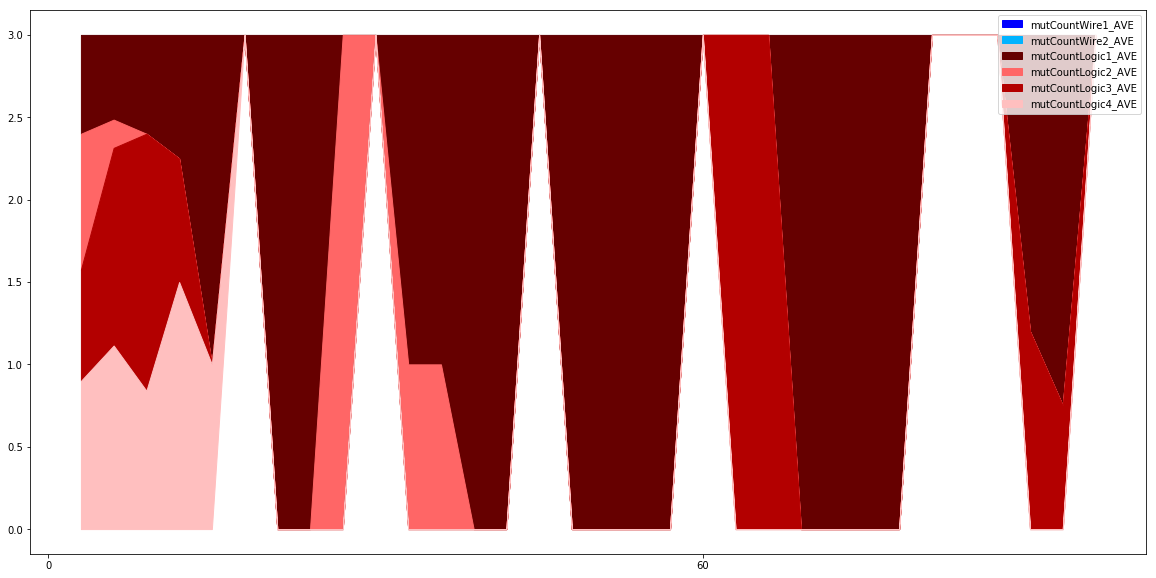

In [12]:
plt.rcParams['figure.figsize'] = (20,10)
relativeMutationRates = []
absolutMutationRates = []
for t in range(1,len(LOD_data_df[LOD_data_keys[0]])):
    relativeMutationRates.append([])
    absolutMutationRates.append([])
    total_mutations_count = 0
    for key in LOD_data_keys:
        total_mutations_count += LOD_data_df[key][t] - LOD_data_df[key][t-1]
    relativeMutationRates[-1].append(binSize);
    total_mutations_amnt = 0
    for key in LOD_data_keys:
        if (total_mutations_count > 0):
            total_mutations_amnt += (LOD_data_df[key][t] - LOD_data_df[key][t-1])/total_mutations_count
        relativeMutationRates[-1].append((1.0 - total_mutations_amnt)*binSize)
        #absolutMutationRates[-1].append((LOD_data_df[key][t] - LOD_data_df[key][t-1])/total_mutations_count)
        absolutMutationRates[-1].append((LOD_data_df[key][t] - LOD_data_df[key][t-1]))
    relativeMutationRates[-1].append(0.0);
relativeMutationRates=np.transpose(relativeMutationRates)
absolutMutationRates=np.transpose(absolutMutationRates)

colorList = [(.5,.5,1,.8),(0,0,1,.8),(.3,0,0,1),(.6,.3,.2,.8),(1,.6,.4,.8),(1,.8,.2,.8)]
colorList = [(0,0,1),(0,.7,1),(.4,0,0),(1,.4,.4),(.7,0,0),(1,.75,.75),]

for i in range(1,7):
    #if i != 2:
        plt.fill_between(range(1,len(LOD_data_df[LOD_data_keys[0]])),relativeMutationRates[i],relativeMutationRates[i-1],label=LOD_data_keys[i-1],color=colorList[i-1])
plt.legend()
plt.xticks(range(0,len(LOD_data_df[LOD_data_keys[0]]),20),range(0,len(LOD_data_df[LOD_data_keys[0]])*binSize,binSize*20))
#plt.yscale('symlog')
#plt.xscale('symlog')
plt.show()

In [ ]:
for i in range(0,6):
    plt.plot(range(1,len(LOD_data_df[LOD_data_keys[0]])),absolutMutationRates[i],label=mutation_names[i],color=colorList[i],lineWidth=2)
plt.legend()
plt.xticks(range(0,len(LOD_data_df[LOD_data_keys[0]]),20),range(0,len(LOD_data_df[LOD_data_keys[0]])*binSize,binSize*20))
#plt.yscale('symlog')
#plt.xscale('symlog')
plt.show()

In [ ]:
# this code will save mutation programs. it's a mess... sorry

text_file = open("mutationProgram_fixationRate_all.csv", "w")
text_file_half = open("mutationProgram_fixationRate_all_half.csv", "w")
text_file_inv = open("mutationProgram_fixationRateInv_all.csv", "w")
text_file_inv_half = open("mutationProgram_fixationRateInv_all_half.csv", "w")
text_file.write("update,onePerBrain,onePerGate,wire1,wire2,logic1,logic2,logic3,logic4\n")
text_file_half.write("update,onePerBrain,onePerGate,wire1,wire2,logic1,logic2,logic3,logic4\n")
text_file_inv.write("update,onePerBrain,onePerGate,wire1,wire2,logic1,logic2,logic3,logic4\n")
text_file_inv_half.write("update,onePerBrain,onePerGate,wire1,wire2,logic1,logic2,logic3,logic4\n")


for t in range(1,len(LOD_data_df[LOD_data_keys[0]])):
    total_mutations_count = 0
    for key in LOD_data_keys:
        total_mutations_count += LOD_data_df[key][t]

    inverseTotal = 0
    for key in LOD_data_keys:
        if (LOD_data_df[key][t] != 0):
            inverseTotal+=1/LOD_data_df[key][t]
    
    outDataMutRates = ""
    outDataMutRatesHalf = ""
    outDataMutRatesInv = ""
    outDataMutRatesInvHalf = ""
    for key in LOD_data_keys:
        if (LOD_data_df[key][t] != 0):
            outDataMutRates += str(LOD_data_df[key][t]/total_mutations_count) + ','
            outDataMutRatesHalf += str(((LOD_data_df[key][t]/total_mutations_count) + (1/6))/2) + ','
            outDataMutRatesInv += str((1/LOD_data_df[key][t])/inverseTotal) + ','
            outDataMutRatesInvHalf += str((((1/LOD_data_df[key][t])/inverseTotal) + (1/6))/2) + ','
        else:
            outDataMutRates += '0,'
            outDataMutRatesHalf += '0,'
            outDataMutRatesInv += '0,'
            outDataMutRatesInvHalf += '0,'

    outDataMutRates = outDataMutRates[0:-1]
    outDataMutRatesHalf = outDataMutRatesHalf[0:-1]
    outDataMutRatesInv = outDataMutRatesInv[0:-1]
    outDataMutRatesInvHalf = outDataMutRatesInvHalf[0:-1]
    if t == 1:  # if time is one, we need to write out line for time 0
        text_file.write('0,1,-1,' + outDataMutRates + '\n')
        text_file_half.write('0,1,-1,' + outDataMutRatesHalf + '\n')
        text_file_inv.write('0,1,-1,' + outDataMutRatesInv + '\n')
        text_file_inv_half.write('0,1,-1,' + outDataMutRatesInvHalf + '\n')
    text_file.write(str(t) + ',1,-1,' + outDataMutRates + '\n')
    text_file_half.write(str(t) + ',1,-1,' + outDataMutRatesHalf + '\n')
    text_file_inv.write(str(t) + ',1,-1,' + outDataMutRatesInv + '\n')
    text_file_inv_half.write(str(t) + ',1,-1,' + outDataMutRatesInvHalf + '\n')

text_file.close()    
text_file_half.close()
text_file_inv.close()
text_file_inv_half.close()

print('last line of data: ', outDataMutRates)
print('checksum: ', sum([float(i) for i in outDataMutRates.split(',')]))